In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv("/content/sample_data/california_housing_test.csv")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


Question 1: Maximum Likelihood Estimates (MLE) Parameters
latitude - Mean: 35.635389999999994, Std Dev: 2.129669523343834
total_rooms - Mean: 2599.578666666667, Std Dev: 2155.593331625581
housing_median_age - Mean: 28.845333333333333, Std Dev: 12.555395554955753
total_bedrooms - Mean: 529.9506666666666, Std Dev: 415.6543681363229

Question 2: Log-Likelihood Values for 'latitude'
Log-Likelihood for 50: -24.422383214813756
Log-Likelihood for 75: -172.50228474173102
Log-Likelihood for 80: -218.65450750813483

Max Likelihood Value for 'latitude': 35.635389999999994

Question 3: Density Estimations and Observations


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


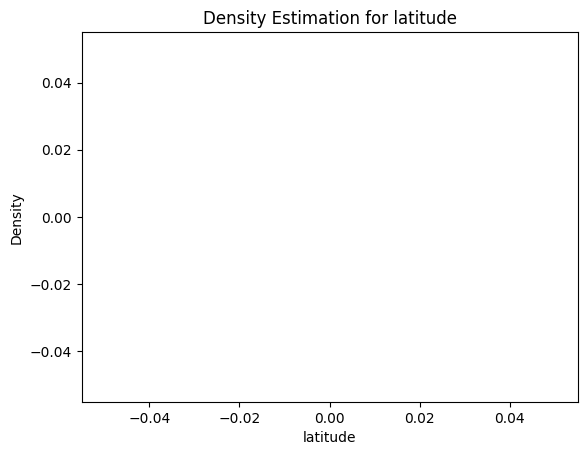

Density for latitude with bins [5, 10, 15, 20]: [nan nan nan]


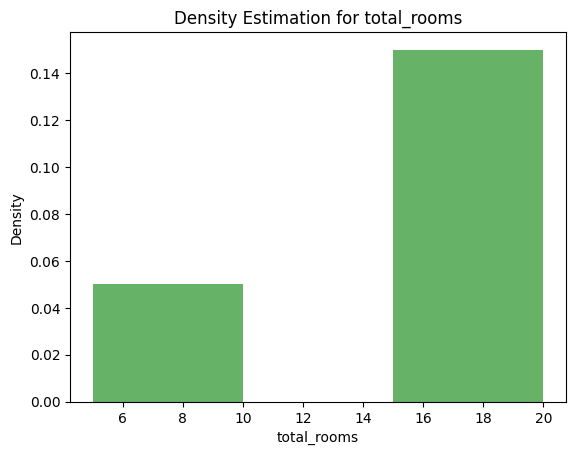

Density for total_rooms with bins [5, 10, 15, 20]: [0.05 0.   0.15]


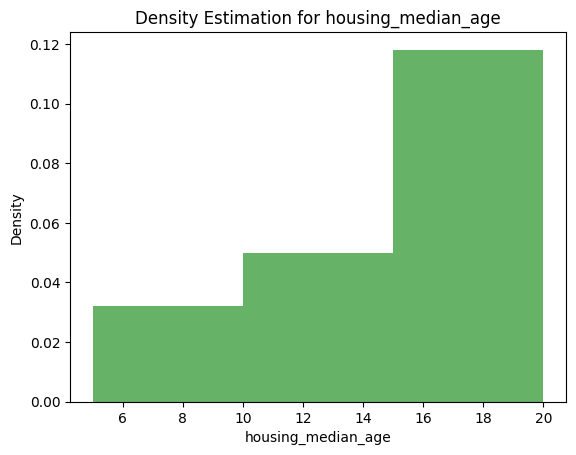

Density for housing_median_age with bins [5, 10, 15, 20]: [0.03218935 0.04970414 0.11810651]


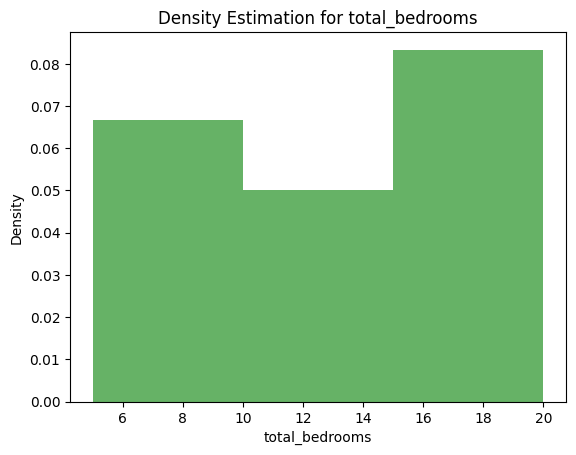

Density for total_bedrooms with bins [5, 10, 15, 20]: [0.06666667 0.05       0.08333333]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

columns = ['latitude', 'total_rooms', 'housing_median_age', 'total_bedrooms']
data = df[columns]

# Question 1: Find the maximum likelihood parameters for each column individually
mle_parameters = {}
for col in columns:
    mean = data[col].mean()
    std_dev = data[col].std()
    mle_parameters[col] = {'mean': mean, 'std_dev': std_dev}

print("Question 1: Maximum Likelihood Estimates (MLE) Parameters")
for col, params in mle_parameters.items():
    print(f"{col} - Mean: {params['mean']}, Std Dev: {params['std_dev']}")

# Question 2: Find log-likelihood values for 50, 75, and 80 for 'latitude'
values = [50, 75, 80]
latitude_mean = mle_parameters['latitude']['mean']
latitude_std = mle_parameters['latitude']['std_dev']

log_likelihoods = {}
for value in values:
    log_likelihood = norm.logpdf(value, latitude_mean, latitude_std)
    log_likelihoods[value] = log_likelihood

print("\nQuestion 2: Log-Likelihood Values for 'latitude'")
for value, log_likelihood in log_likelihoods.items():
    print(f"Log-Likelihood for {value}: {log_likelihood}")

max_likelihood_value = latitude_mean
print(f"\nMax Likelihood Value for 'latitude': {max_likelihood_value}")

# Question 3: Estimate the density for each column with specified bins
bins = [5, 10, 15, 20]

print("\nQuestion 3: Density Estimations and Observations")
for col in columns:
    plt.hist(data[col], bins=bins, density=True, alpha=0.6, color='g')
    plt.title(f'Density Estimation for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

    density, _ = np.histogram(data[col], bins=bins, density=True)
    print(f"Density for {col} with bins {bins}: {density}")



